In [80]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [82]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [84]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [86]:
df1.shape

(13320, 9)

In [88]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [90]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [92]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [94]:
df2 = df1.copy()
df2 = df2.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [96]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [98]:
df3 = df2.copy()
df3 = df3.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [100]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [102]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [104]:
# sentence = "i am mustafa ahmad"
# sentence.split()

In [106]:
# n = int(input("enter the number of elements:"))
# numbers = input("enter the numbers ").split()
# for i in range(0,n):
#     numbers[i]=int(numbers[i])
#     print(numbers)

# numbers    

In [108]:
# def extract_bhk(x):
#     try:
#         return int(x.split()[0])  # Extract the numeric part
#     except:
#         return None  # Handle invalid or missing values

# df3.loc[:, 'bhk'] = df3['size'].apply(extract_bhk)
# print(df3.bhk.unique())

In [110]:
df3.loc[:,'bhk'] = df3['size'].apply(lambda x:int(x.split()[0]))
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [112]:
df3[df3.bhk>20] # it will return some values having less total_sqft but greater bhk and bath values

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [144]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


In [136]:
# Get unique values from the total_sqft column
unique_values = df3['total_sqft'].unique()

# Find the maximum value among the unique values
max_unique_value = max(unique_values)

print("Maximum unique value in total_sqft:", max_unique_value)

Maximum unique value in total_sqft: 999


In [138]:
# Get and sort unique values
sorted_unique_values = sorted(df3['total_sqft'].unique())

print("All unique values sorted:")
print(sorted_unique_values)

print("\nMaximum unique value:", sorted_unique_values[-1])

All unique values sorted:
['1', '1.25Acres', '1.26Acres', '1000', '1000 - 1285', '10000', '1000Sq. Meter', '1001', '1002', '1003', '10030', '1004', '1004 - 1204', '1005', '1005.03 - 1252.49', '1006', '1007', '1008', '1009', '1010', '1010 - 1300', '1011', '1012', '1013', '1014', '1015', '1015 - 1540', '1016', '1017', '1018', '1019', '1020', '1020.07', '10200', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1039', '1040', '1041', '1042 - 1105', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1052 - 1322', '1053', '1053.4', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '10624', '1063', '1065', '1066', '1067', '1068', '1069', '1070', '1070 - 1315', '1071', '1072', '1073', '1074', '1075', '1076', '1076 - 1199', '1077', '1078', '1079', '1079 - 1183', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', 

In [140]:
# df3.total_sqft.unique()

In [116]:
df3['total_sqft'].loc[df3['total_sqft'].str.contains('-')].value_counts().sum()

144

In [118]:
df3['total_sqft'].loc[df3['total_sqft'].str.contains('r')].value_counts().sum()

42

In [120]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [130]:
df3[~df3.total_sqft.apply(is_float)].head(200)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [124]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [609]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [611]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [613]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [615]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [617]:
df4a = df4.dropna() 
df4a.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [619]:
# What Happens Without price_per_sqft?
# If we don’t calculate and use price_per_sqft, the outlier detection process would be based solely on the total price of the properties. This can lead to the following issues:

# 1. Misidentification of Outliers
# Large Properties: A large property with a high total price might be flagged as an outlier, even if its price per square foot is reasonable.

# Small Properties: A small property with a low total price might not be flagged as an outlier, even if its price per square foot is unreasonably high.

In [621]:
df5 = df4a.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [623]:
len(df5.location.unique())

1298

In [625]:
# df5.location = df5.location.apply(lambda x: x.strip() if isinstance(x, str) else x)
# location_stats=df5.groupby('location')['location'].agg('count')
# location_stats

In [627]:
# "@@@Mustafa Ahmad@@@".strip('@')     strip read first leading character then read from backside first trailing character
# "@@@Mustafa Ahmad ktk".strip('@') 

In [629]:
# " @@@Mustafa Ahmad@@@".strip('@')    #strips remove leading and trailing character, 
# but here first leading character is whitespace and from backside first leading character is @

In [631]:
# "hello world".strip('dloh')  # dloh will compare with first leading h and so on then stop 
# and then compare with first trailing character from back side which is d in word and so on and then stop 

In [633]:
# "  Mustafa Ahmad  ".strip()

In [635]:
df5.location = df5.location.apply(lambda x: x.strip() if isinstance(x, str) else x)

In [637]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [639]:
len(df5.location.unique())

1287

In [641]:
location_stats[location_stats<15]

location
Chamrajpet               14
1st Block Jayanagar      14
Doddakallasandra         14
Sarakki Nagar            14
Sultan Palaya            14
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1102, dtype: int64

In [643]:
location_stats_less_than_15=location_stats[location_stats<15]
location_stats_less_than_15

location
Chamrajpet               14
1st Block Jayanagar      14
Doddakallasandra         14
Sarakki Nagar            14
Sultan Palaya            14
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1102, dtype: int64

In [645]:
len(df5.location.unique())

1287

In [647]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_15 else x)
len(df5.location.unique())

186

In [649]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [651]:
df5[df5.total_sqft/df5.bhk<350].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
26,Electronic City,2 BHK,660.0,1.0,23.1,2,3500.000000
29,Electronic City,3 BHK,1025.0,2.0,47.0,3,4585.365854
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810


In [653]:
df5.shape

(13200, 7)

In [655]:
df6 = df5[~(df5.total_sqft/df5.bhk<350)]
df6.shape

(12106, 7)

In [657]:
df6.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [659]:
df6.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [661]:
 # Explanation of Changes:
# extend vs append:

# extend is used to add all elements from an iterable (like a list or array) to the list.

# append is used to add a single element to the list.

# Modification:

# Instead of using exclude_indices.extend(outliers.index.values), which adds all indices from outliers.index.values at once, we loop through each index in outliers.index.values and use exclude_indices.append(index) to add them one by one.

# Performance Consideration:
# Using extend is generally more efficient when adding multiple elements at once because it avoids the overhead of repeatedly calling append in a loop. However, in this case, the performance difference might not be significant unless the dataset is very large.

# Conclusion:
# You can use append as shown above, but extend is more concise and efficient for this use case. If performance is a concern, stick with extend.


In [663]:
# def remove_pps_outliers_improved(df, threshold=1.0):
#     exclude_indices = []  
    
#     for location, subdf in df.groupby('location'):
#         mean = subdf['price_per_sqft'].mean()    # Use Pandas' mean() to ignore NaN values   
#         std = subdf['price_per_sqft'].std()      # Use Pandas' std() to ignore NaN values    

#         lower_bound = mean - threshold * std
#         upper_bound = mean + threshold * std       

#         outliers = subdf[(subdf['price_per_sqft'] > upper_bound) | (subdf['price_per_sqft'] < lower_bound)]
#         exclude_indices.extend(outliers.index.tolist())
    
#     cleaned_df = df.drop(exclude_indices, axis='index').reset_index(drop=True)    
#     return cleaned_df, exclude_indices

# df7, excluded_indices = remove_pps_outliers_improved(df6, threshold=1)
# print(df7.shape)
# print(f"Excluded {len(excluded_indices)} rows")

In [665]:
df6.shape

(12106, 7)

In [667]:
def remove_pps_outliers(df, n=1):
    filtered_dfs = []
    removed = []
    for location, subdf in df.groupby('location'):
        mean = subdf.price_per_sqft.mean()
        std = subdf.price_per_sqft.std()

        filtered_df = subdf[(subdf.price_per_sqft > (mean - n * std)) & (subdf.price_per_sqft < (mean + n * std))]
        filtered_dfs.append(filtered_df)
        excluded_rows = subdf[~((subdf.price_per_sqft > (mean - n * std)) & (subdf.price_per_sqft < (mean + n * std)))]
        removed.append(excluded_rows)
     
    result_df = pd.concat(filtered_dfs, ignore_index=True)
    rem = pd.concat(removed, ignore_index=True)
    return result_df, rem

df7, rem = remove_pps_outliers(df6, n=1)
print(f"Excluded {len(rem)} rows")
print(df7.shape)

Excluded 2126 rows
(9980, 7)


In [668]:
# def remove_pps_outliers(df):
#     df_out = pd.DataFrame()
#     for key, subdf in df.groupby('location'):
#         m = subdf.price_per_sqft.mean()
#         st = subdf.price_per_sqft.std()
#         reduced_df = subdf[(subdf.price_per_sqft>(m-1*st)) & (subdf.price_per_sqft<(m+1*st))]
#         df_out = pd.concat([df_out,reduced_df],ignore_index=True)
#     return df_out   
# df7 = remove_pps_outliers(df6a)
# df7.shape

In [671]:
df7.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

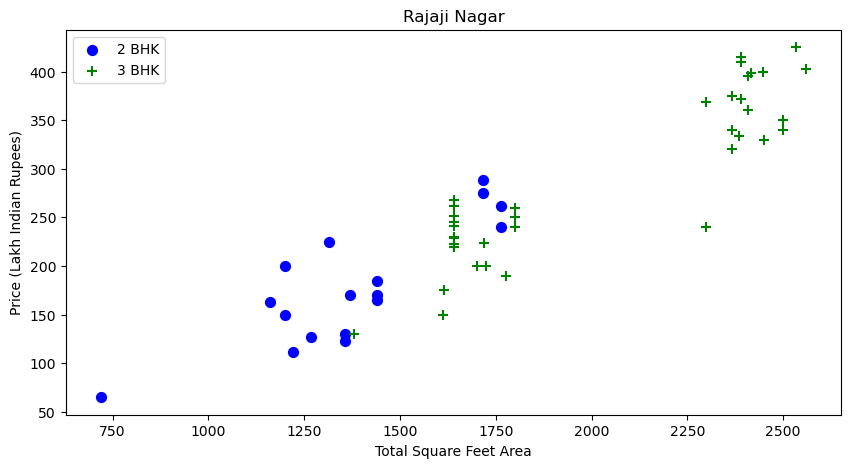

In [673]:
def plot_scatter_chart(df,loc):
    bhk2 = df[(df.location==loc) & (df.bhk==2)]
    bhk3 = df[(df.location==loc) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(loc)
    plt.legend()
    plt.show()
    
plot_scatter_chart(df7,"Rajaji Nagar")

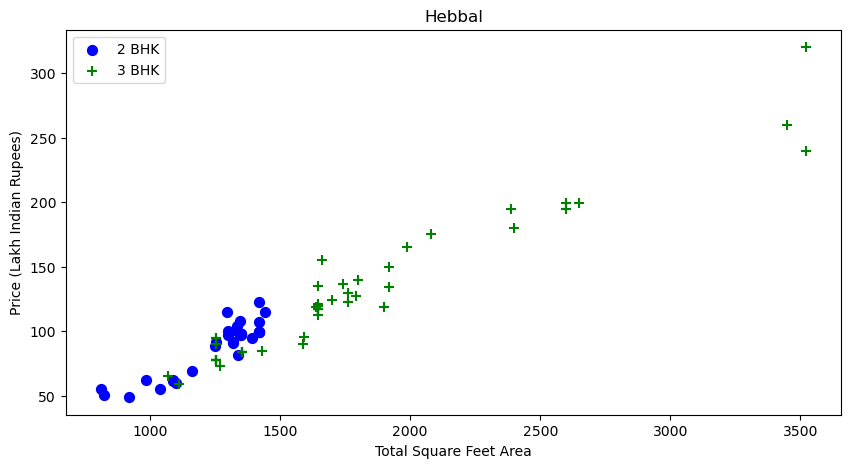

In [674]:
plot_scatter_chart(df7,"Hebbal")

In [676]:
# In your scenario, where you are working with **grouped data** (e.g., grouped by `location` and `bhk`) and need to detect outliers in the `price_per_sqft` column, the choice of the **best approach** depends on the **characteristics of your data** and the **specific requirements** of your use case. Let’s compare the **three methods**—**Standard Deviation-Based**, **IQR (Interquartile Range)**, and **Z-Score**—and determine which one is the **best approach** for your case.

# ---

# ### **Comparison of Methods**

# | **Method**                     | **Best For**                                                                 | **Limitations**                                                                 |
# |--------------------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------|
# | **Standard Deviation-Based**   | Normally distributed data, grouped data, customizable thresholds.           | Sensitive to skewed data and extreme outliers.                                 |
# | **IQR (Interquartile Range)**  | Skewed data, non-normal distributions, robust to extreme outliers.          | Less suitable for small group sizes, fixed threshold (`1.5 * IQR`).            |
# | **Z-Score**                    | Normally distributed data, interpretable, customizable thresholds.          | Sensitive to skewed data, assumes normality, computationally expensive.        |

# ---

# ### **Key Considerations for Your Scenario**

# 1. **Data Distribution**:
#    - If the `price_per_sqft` values within each group are **approximately normally distributed**, the **Z-Score** or **Standard Deviation-Based** method is suitable.
#    - If the data is **skewed** or has **extreme outliers**, the **IQR method** is more robust.

# 2. **Group Sizes**:
#    - If some groups have **small sizes**, the **Standard Deviation-Based** method is more reliable than the IQR method, which relies on quartiles.

# 3. **Computational Complexity**:
#    - The **Standard Deviation-Based** method is computationally efficient for grouped data.
#    - The **Z-Score** method requires calculating the mean and standard deviation for each group, which can be expensive for large datasets with many groups.

# 4. **Customizability**:
#    - The **Standard Deviation-Based** and **Z-Score** methods allow for customizable thresholds (e.g., `1.0 * std`, `2.0 * std`, or `|Z| > 2`, `|Z| > 3`).
#    - The **IQR method** uses a fixed threshold (`1.5 * IQR`), which might not be suitable for all groups.

# 5. **Interpretability**:
#    - The **Z-Score** method provides a clear and interpretable measure of how far a data point is from the mean.
#    - The **Standard Deviation-Based** method is also intuitive and easy to explain.

# ---

# ### **Recommended Approach**

# Based on the above considerations, the **Standard Deviation-Based method** is the **best approach** for your scenario because:
# 1. It works well with **grouped data** and is computationally efficient.
# 2. It allows for **customizable thresholds**, making it flexible for different groups.
# 3. It handles **small group sizes** better than the IQR method.
# 4. It is **intuitive** and easy to interpret.

# However, if your data is **highly skewed** or contains **extreme outliers**, you might consider using the **IQR method** as an alternative or in combination with the Standard Deviation-Based method.


In [679]:
# def remove_bhk_outliers_improved(df, min_count=5, threshold=1.0):
#     exclude_indices = []  # Use a list for efficient appending
    
#     for location, location_df in df.groupby('location'):
#         bhk_stats = {}
        
#         # Calculate statistics for each bhk group
#         for bhk, bhk_df in location_df.groupby('bhk'):
#             if bhk_df['price_per_sqft'].notna().sum() >= min_count:  # Handle NaN values and small groups
#                 bhk_stats[bhk] = {
#                     'mean': bhk_df['price_per_sqft'].mean(),  # Ignore NaNs
#                     'std': bhk_df['price_per_sqft'].std(),    # Ignore NaNs
#                     'count': bhk_df.shape[0]
#                 }
        
#         # Identify outliers based on the previous bhk group
#         for bhk, bhk_df in location_df.groupby('bhk'):
#             if bhk - 1 in bhk_stats and bhk_stats[bhk - 1]['count'] >= min_count:
#                 lower_bound = bhk_stats[bhk - 1]['mean'] - threshold * bhk_stats[bhk - 1]['std']
#                 exclude_indices.extend(bhk_df[bhk_df['price_per_sqft'] < lower_bound].index.tolist())
    
#     # Drop the outliers and return the cleaned DataFrame and excluded indices
#     cleaned_df = df.drop(exclude_indices, axis='index')
#     return cleaned_df, exclude_indices

# df8, excluded_indices = remove_bhk_outliers_improved(df7, min_count=5, threshold=0.5)
# print(df8.shape)
# print(f"Excluded {len(excluded_indices)} rows")

In [681]:
def remove_bhk_outliers(df):
    exclude_indices = []  # Use a list for better performance 
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': bhk_df['price_per_sqft'].mean(),        
                'count': bhk_df.shape[0]                 #  Here, df.shape returns (3, 2) because the DataFrame has 3 rows and 2 columns.
                                        # When you use [0] with .shape, you are accessing the first element of the tuple, which is the number of rows.
                                        # the second element is [1] which represent columns
            }        
        # Identify outliers based on the previous bhk group's mean
        for bhk, bhk_df in location_df.groupby('bhk'):
            if bhk - 1 in bhk_stats and bhk_stats[bhk - 1]['count'] > 5:
                mean_prev_bhk = bhk_stats[bhk - 1]['mean']
                outliers = bhk_df[bhk_df['price_per_sqft'] < mean_prev_bhk]
                exclude_indices.extend(outliers.index.values)
    
    print(f"Excluded {len(exclude_indices)} rows")
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
print(df8.shape)

Excluded 3075 rows
(6905, 7)


In [683]:
# Explanation of Changes:
# extend vs append:

# extend is used to add all elements from an iterable (like a list or array) to the list.

# append is used to add a single element to the list.

# Modification:

# Instead of using exclude_indices.extend(outliers.index.values), which adds all indices from outliers.index.values at once, we loop through each index in outliers.index.values and use exclude_indices.append(index) to add them one by one.

# Performance Consideration:
# Using extend is generally more efficient when adding multiple elements at once because it avoids the overhead of repeatedly calling append in a loop. However, in this case, the performance difference might not be significant unless the dataset is very large.

# Conclusion:
# You can use append as shown above, but extend is more concise and efficient for this use case. If performance is a concern, stick with extend.



In [685]:
# def remove_bhk_outliers(df):
#     exclude_indices = np.array([])
#     for location, location_df in df.groupby('location'):
#         bhk_stats = {}
#         for bhk, bhk_df in location_df.groupby('bhk'):
#             bhk_stats[bhk] = {
#                 'mean': np.mean(bhk_df.price_per_sqft),
#                 'count': bhk_df.shape[0]
#             }
#         for bhk, bhk_df in location_df.groupby('bhk'):
#             stats = bhk_stats.get(bhk - 1)
#             if stats and stats['count'] > 5:
#                 exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
#     print(f"Excluded {len(exclude_indices)} rows")            
#     return df.drop(exclude_indices, axis='index')
# df8 = remove_bhk_outliers(df7)  
# print(df8.shape)

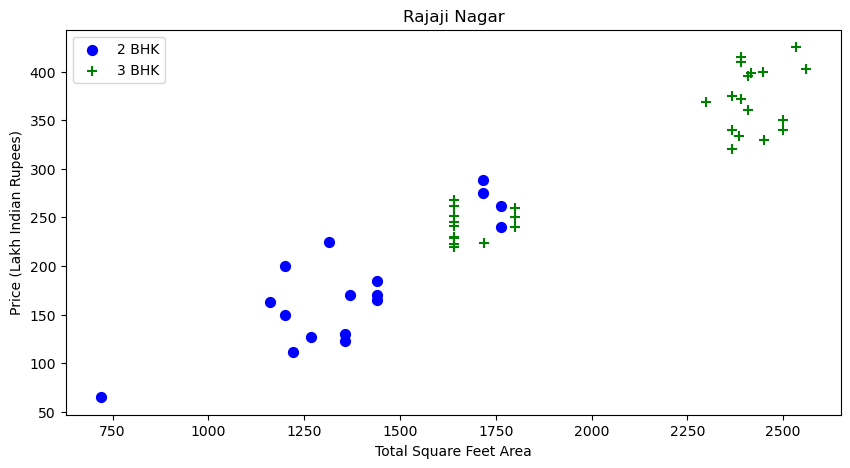

In [687]:
plot_scatter_chart(df8,"Rajaji Nagar")

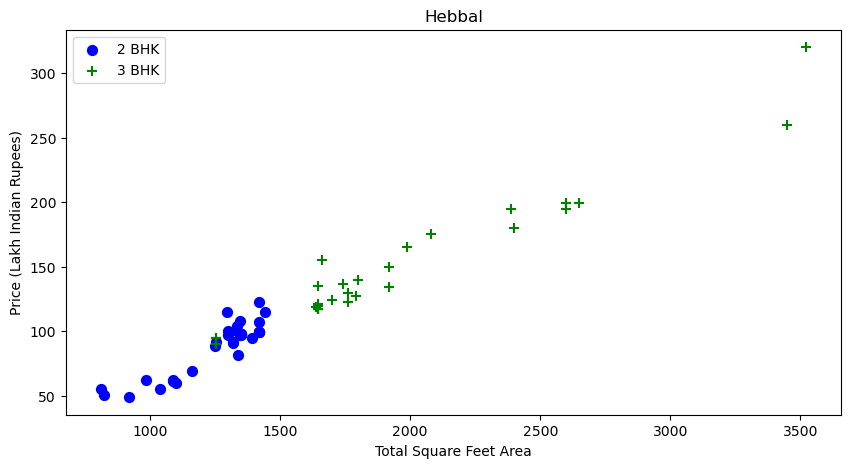

In [689]:
plot_scatter_chart(df8,"Hebbal")

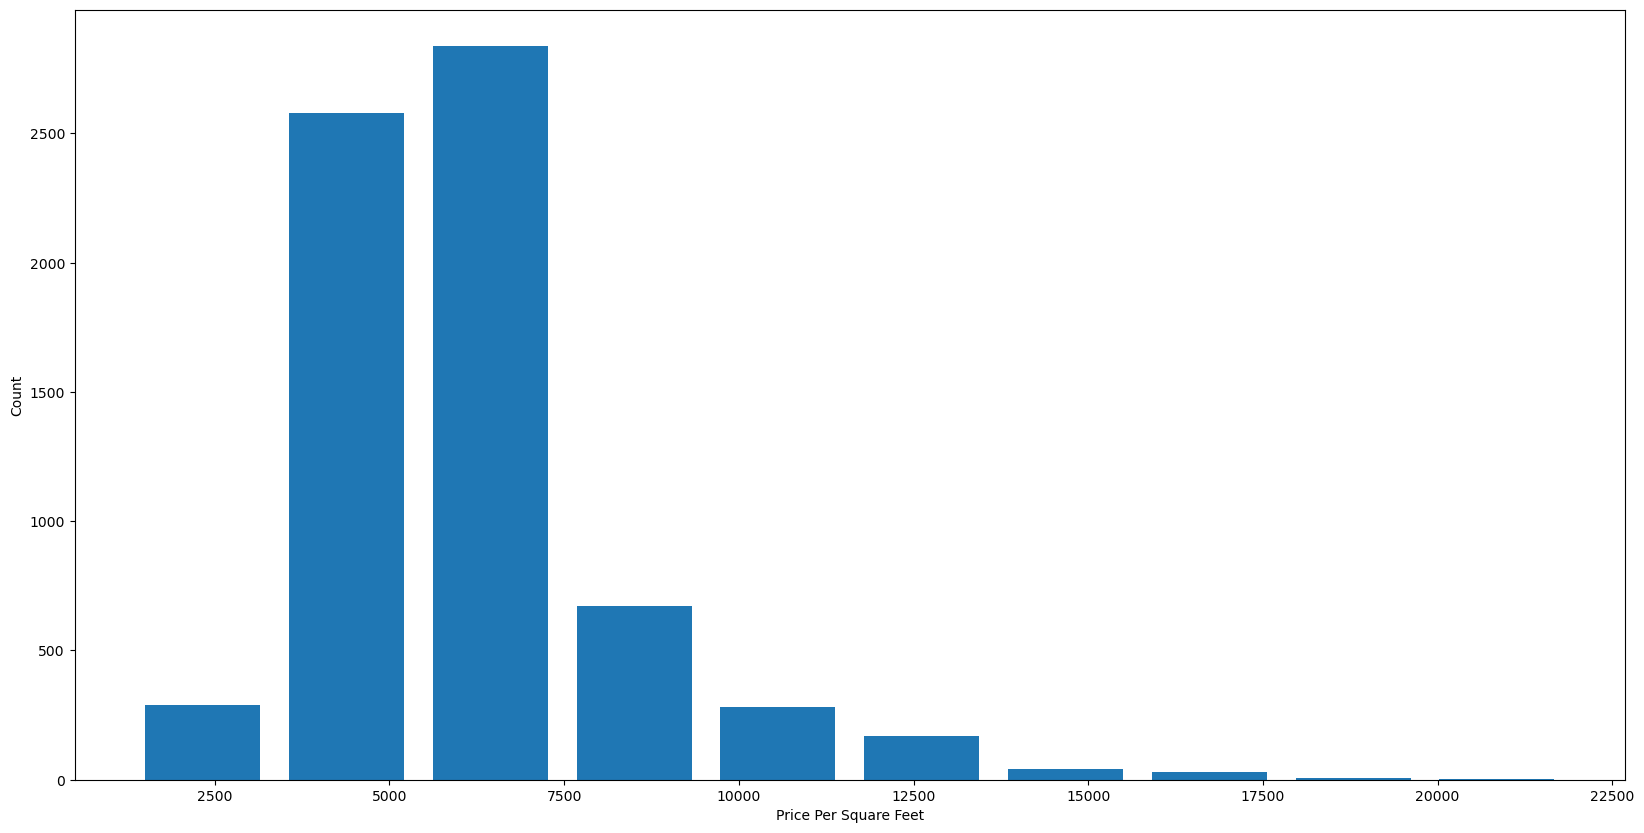

In [691]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

In [693]:
df8.bath.unique()

array([ 3.,  4.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

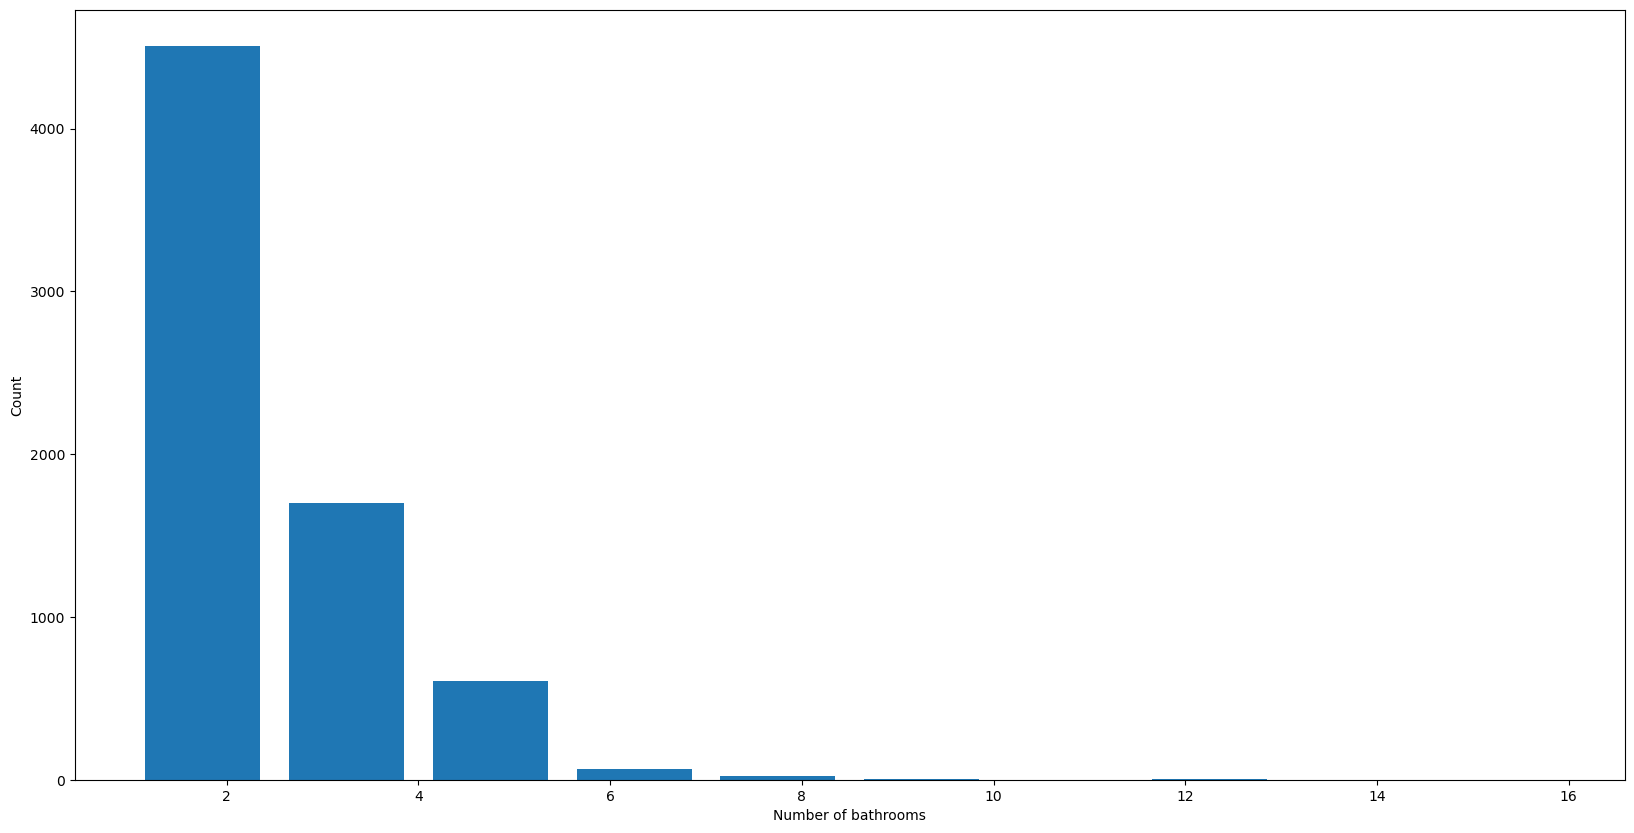

In [695]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [697]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7914,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8023,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
8872,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9004,other,10 BHK,4000.0,12.0,160.0,10,4000.000000
9277,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [699]:
df8[df8.bath>df8.bhk+2] # these are the outlier which we will have to remove

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6097,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7820,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9573,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [701]:
df8.shape

(6905, 7)

In [703]:
df9 = df8[df8.bath<df8.bhk+2]   # reverse the comparison operator and remove outlier
df9.shape

(6831, 7)

In [705]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525


In [707]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,2065.0,4.0,210.0,3
4,1st Phase JP Nagar,2059.0,3.0,225.0,3


In [709]:
dummies = pd.get_dummies(df10.location, dtype=int)  # Add dtype=int to get 1/0 directly instead of getting true/false
dummies.head(3)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [711]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,2065.0,4.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,2059.0,3.0,225.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1077.0,2.0,93.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [713]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [715]:

df12.shape

(6831, 189)

In [717]:
# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
# prep = preprocessing.StandardScaler().fit(X)
# X_transform = prep.fit_transform(X)

In [761]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2059.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [763]:
X.shape

(6831, 188)

In [765]:
y = df12.price
y.head(3)

1    167.0
2    210.0
4    225.0
Name: price, dtype: float64

In [767]:
# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
# prep = preprocessing.StandardScaler().fit(X)
# X_transform = prep.fit_transform(X)

In [769]:
# from sklearn import preprocessing
# prep = preprocessing.StandardScaler().fit(y)
# y_transform = prep.fit_transform(y)

In [771]:
len(y)

6831

In [773]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [775]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8565225769175943

In [777]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78936441, 0.80315329, 0.83491547, 0.78957666, 0.78482605])

In [779]:
# def predict_price(location,sqft,bath,bhk):    
#     loc_index = np.where(X.columns==location)[0][0]

#     x = np.zeros(len(X.columns))
#     x[0] = sqft
#     x[1] = bath
#     x[2] = bhk
#     if loc_index >= 0:
#         x[loc_index] = 1

#     return lr_clf.predict([x])[0]

In [781]:
# Key Takeaways
# columns=X.columns is not user-defined:

# columns is a built-in parameter of pd.DataFrame.

# X.columns is a built-in attribute of the DataFrame X.

In [783]:
def predict_price(location, sqft, bath, bhk):
    input_data = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)
    
    input_data['total_sqft'] = sqft
    input_data['bath'] = bath
    input_data['bhk'] = bhk
    
    if location in input_data.columns:
        input_data[location] = 1
    
    return lr_clf.predict(input_data)[0]

In [785]:
predict_price('1st Phase JP Nagar',1000,3,2)

90.45381901457841

In [787]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

90.98916035320374

In [1650]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [1652]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))

In [1654]:
columns = {
    'data_columns' : list(X.columns)  # Save column names in original case
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))